# Лабораторная работа. Вероятностные модели.

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков IPython (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете также должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

Мы уверены, что выполнение лабораторных работ занимает значительное время, поэтому не рекомендуем оставлять их на последний вечер перед сдачей.

### Оценивание и штрафы
* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* Максимально допустимая оценка за работу — 20 баллов.
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса)
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировками
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

Обратите внимание, что мы не ставим оценку за просто написанный код, корректная работоспособность которого не подтверждена экспериментами.


Цель этой лабораторной работы – научиться строить вероятностные модели и оптимизировать их параметры на примере задачи оценки риска заболевания сахарным диабетом. На задачу оценки риска болезни мы посмотрим со стороны страховой компании.

Если человек перестанет проходить обследования, и страховая так и не узнает, развился ли у него диабет, то и расходов, связанных с его заболеванием не будет, т.е. можно считать, что такой человек остался здоров. То же касается людей, у которых заболевание впервые обнаружат более чем через 5 лет.

Чтобы рассчитать математическое ожидание затрат на лечение клиента, страховая хочет получить в качестве результата работы модели непосредственно вероятность того, что у человека, не страдающего от заболевания, оно разовьётся в течение 5 лет. Поэтому в качестве метрики качества была выбрана бинарная кросс-энтропия (она же logloss) между предсказанными вероятностями и истинными метками классов:


$$\text{crossentropy}(y, p) = -\frac{1}{N}\sum_{i=1}^N\left[y_i\log(p_i) + (1-y_i)\log(1-p_i)\right]$$



**Задание 1** Препроцессинг (1 балл) 

По известным медицинским показателям требуется определить, разовьётся ли у пациента диабет в ближайшие 5 лет.

Известно, что пациенты были здоровы в момент первого обследования. Пациенты, у которых диабет был обнаружен в первые 2 года исследования, также не вошли в выборку. Пациенты сдавали анализ на глюкозу не реже раза в год. Если у пациента на очередном обследовании был обнаружен диабет, его участие в исследовании на этом заканчивалось. Если пациент отказывался от продолжения участия в исследовании, считалось, что он остался здоров.

**Данные**

X_train и y_train - обучающая выборка, X_test - выборка, для которой необходимо сделать предсказание.

features_info - описание признаков.

**Кратко про признаки**:

Признаки описывают:

* Пациента в момент начала исследования (пол 1-муж., 2-жен.; возраст; индекс массы тела; ...)

* site - регион проживания пациента, закодированный номером.

* Результаты анализов пациента в момент начала исследования. В т.ч. Fasting plasma glucose - концентрация глюкозы в крови, ммоль/литр, по этому анализу определяют наличие диабета. В момент первого визита все пациенты в выборке здоровы

* Наличие вредных привычек.
* Наличие случаев диабета среди родственников
* year of followup - через сколько лет после начала исследования состоялся последний визит. признак недоступен для тестовых данных
* Fasting plasma glucose (final visit) - уровень глюкозы при последнем визите. признак недоступен для тестовых данных
* Diabetes diagnosed during followup - отмечены люди, получившие диагноз "диабет" независимо от исследования в период проведения исследования. признак недоступен для тестовых данных
* censor of diabetes at followup - 1, если Diabetes diagnosed during followup = 1 или Fasting plasma glucose (final visit) > 7. Иначе - 0. признак недоступен для тестовых данных

y_train содержит целевой признак diabettes in 5 years, равный 1, если censor of diabetes at followup = 1 и year of followup < 5, и 0 иначе.

Важно: Некоторые признаки содержат пропуски. Будьте внимательны!

**Задание**

- Прочитайте описание выше
- Загрузите обучающий набор данных (X_train.csv, y_train.csv).
- Обратите внимание, что часть информации о клиентах неизвестна на момент заключения договора. Соответствующие признаки отсутствуют в X_test.csv.
- Заполните пропуски в данных. Для этого могут пригодиться методы из sklearn.impute или pandas.DataFrame.fillna.
- По желанию используйте любой препроцессинг данных, добавляйте новые признаки и т.п. ваша задача — добиться сходимости и высокого качества полученных моделей.
- Разбейте обучающую выборку на lab_train и lab_test, которые будете использовать для оценки всех построенных моделей в лабораторной работе. При желании использовать для оценки качества кросс-валидацию необходимо проконтролировать, чтобы для всех моделей использовались одни и те же разбиения.

In [5]:
from google.colab import drive
drive.mount('/content/drive')
PATH = '/content/drive/MyDrive/Shad/2021ml/lab3/'

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
X_train = pd.read_csv(PATH + 'X_train.csv')
y_train = pd.read_csv(PATH + 'y_train.csv', index_col=0)
# features_info = pd.read_csv(PATH + 'features_info.csv')

Features info

**Age** -- Возраст

**Gender** -- Пол

**Site** -- Регион

**Height** -- Рост

**Weight** -- Масса

**Body mass index** -- Индекс массы тела. Комбинация роста и веса.

**Systolic blood pressure** -- "Систолическое артериальной давление (САД), мм рт. ст. (В нотации 120/80 САД = 120)"

**Diastolic blood pressure** -- "Диастолическое артериальное давление (ДАД), мм рт. ст. (в нотации 120/80 ДАД = 80)"

**Fasting plasma glucose** -- Концентрация глюкозы в крови натощак.

**Cholestero**l -- "Холестерол. Высокое значение связано с неправильным питанием, ожирением, атеросклерозом, сахарным диабетом."

**Triglyceride** -- Триглицериды. Количество нейтральных жиров в крови.

**High-density lipoprotein cholesterol** -- "Холестерол липопротеидов высокой плотности (ЛПВП). Липопротеиды - белковые комплексы, переносящие в крови жиры. При ожирении и связанных проблемах концентрация ЛПВП снижается."

**Low-density lipoprotein cholesterol** -- Липопротеиды низкой плотности. Повышение указывает на проблемы в метаболизме липидов.

**Alanine aminotransferase** -- "Аланинаминотрансфераза. Печеночный фермент, как правило его повышение указывает на проблемы с печенью."

**Aspartate transaminase** -- "Аспартатаминотрансфераза. Печеночный фермент, как правило его повышение указывает на проблемы с печенью."

**Blood urea nitrogen** -- "Азот мочевины крови. Конечный продукт обмена азота в организме, показатель функционального состояния почек и печени."

**Creatinine clearance rate** -- "Клиренс креатинина. Функция почек. Количество крови, которое почки могут очистить от креатинина за одну минуту."

**Fasting plasma glucose of final visit** -- Концентрация глюкозы в плазме крови при последнем посещении

**Diabetes diagnosed during followup** -- Медицинский диагноз в период наблюдения (по медицинским критериям)

**censor of diabetes at followup** -- Конечное состояние - диабет. Медицинский диагноз в период наблюдения ИЛИ Концентрации глюкозы в крови при последнем посещении >= 7)

**Year of followup** -- Сколько лет прошло между первоначальными измерениями и выбыванием из исследования

**Smoking status** -- "Курение. 1: 'current smoker', 2: 'ever smoker', 3: 'never smoker'"

**Drinking status** -- "Употребление алкоголя. 1:'current drinker', 2:'ever drinker', 3: 'never drinker'"

**Family histroy of diabetes** -- "Диабет в семье. 1: 'Yes', 0: 'No'"

In [7]:
X_train.head(4)

,Age,Gender,site,height,weight,Body Mass Index,Systolic blood pressure,diastolic blood pressure,Fasting plasma glucose,Cholesterol,Triglyceride,High-density lipoprotein cholesterol,Low-density lipoprotein cholesterol,Alanine aminotransferase,Aspartate transaminase,Blood urea nitrogen,Creatinine clearance rate,Fasting plasma glucose (final visit),Diabetes diagnosed during followup,censor of diabetes at followup,year of followup,smoking status,drinking status,family history of diabetes
0,53,1,13,163.5,64.1,24.00,106.0,68.0,4.83,3.84,1.35,1.16,2.34,15.9,NaN,5.01,74.8,5.23,NaN,0,2.699521,3.0,3.0,0
1,26,2,3,156.0,68.5,28.10,98.0,68.0,5.12,4.12,0.72,NaN,NaN,12.6,15.3,3.19,54.7,4.33,NaN,0,2.187543,3.0,3.0,0
2,40,2,5,152.0,47.0,20.30,111.0,63.0,5.62,4.30,0.70,1.32,2.73,14.0,17.0,4.38,66.0,4.70,NaN,0,2.042437,3.0,3.0,0
3,34,1,4,177.0,68.0,21.71,133.0,81.0,4.84,4.35,1.39,NaN,NaN,31.8,26.5,5.79,78.9,5.69,NaN,0,2.028747,NaN,NaN,0


In [8]:
y_train['diabettes in 5 years'] = y_train['diabettes in 5 years'].astype(float)
y_train

,diabettes in 5 years
Id,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
99995,0.0
99996,0.0
99997,0.0


In [9]:
for colname in X_train.columns:
    value = 0
    if colname == 'Diabetes diagnosed during followup':
        value = 0
    elif colname in ['smoking status', 'drinking status']:
        value = 3
    elif colname == 'family history of diabetes':
        value = 0
    else:
        value = X_train[colname].mean()
    X_train[colname].fillna(value, inplace=True)

In [10]:
from sklearn.model_selection import train_test_split

lab_train_x, lab_test_x, lab_train_y, lab_test_y = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

**Задание 2** Бэйзлайн – константное предсказание (0.5 балла).

Как понять, работает ли та или иная модель, если сравить метрику не с чем? Чтобы было с чем сравнивать, соберём простой бэйзлайн: предскажем всем клиентам одну и ту же вероятность заболеть в течение 5 лет. Какое значение надо предсказать, чтобы минимизировать кросс-энтропию? Оцените качество такого предсказания.

In [11]:
from sklearn.metrics import log_loss

t2_const_vals = np.linspace(0, 1, 21)

t2_loss = np.array([
    log_loss(lab_test_y, np.full(lab_test_y.shape, cval)) 
    for cval in t2_const_vals]
)
print('loss: ', t2_loss.min())
print('const: ', t2_const_vals[t2_loss.argmin()])

loss:  0.10399875211462986
const:  0.05


**Задание 3** Наивный байесовский классификатор (0.5 балла).

Предположим, что в каждом из классе признаки независимы и имеют нормальное распределение. Тогда подобрать параметры этого распределения поможет модель [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html). Обучите эту модель. Оцените её качество.





In [12]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import log_loss

def grid_search(estimator, param_grid, train_x = lab_train_x, test_x = lab_test_x, train_y = lab_train_y, test_y = lab_test_y):
    params = list(ParameterGrid(param_grid))
    loss = []
    for param in params:
        model = estimator(**param)
        model.fit(train_x, np.ravel(train_y))
        pred = model.predict_proba(test_x)
        loss.append(log_loss(test_y, pred))

    loss = np.array(loss)
    return loss, params

In [13]:
from sklearn.naive_bayes import GaussianNB

grid_search(GaussianNB, {'var_smoothing': [1e-10, 1e-9, 1e-7, 1e-4]})[0].min()

0.0460517018598819

**Задание 4** Дискриминантный анализ (1.5 балла).

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_lda_qda_001.png)

Теперь избавимся от предположения условной независимости признаков относительно целевой переменной. Таким образом, ковариационные матрицы распределений классов не обязательно будут даигональны. Мы можем наложить дополнительное условие в виде [равенства ковариационных матриц](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis) всех классов или [не делать этого](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis).

Попробуйте оба варианта. Какой сработал лучше и чем это можно объяснить?


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

t4_loss_lda = grid_search(LinearDiscriminantAnalysis, {})[0].min()
t4_loss_qda = grid_search(QuadraticDiscriminantAnalysis, {'reg_param': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]})[0].min()

In [15]:
print('LDA: ', t4_loss_lda)
print('QDA: ', t4_loss_qda)

LDA:  0.0460517018598819
QDA:  0.0460517018598819


**Задание 5** Логистическая регрессия (1.5 балла).

Обучите модель логистической регрессии. Убедитесь, что модель сошлась. Удалось ли получить улучшение по сравнению с предыдущими моделями? Чем это можно объяснить?

In [16]:
from sklearn.linear_model import LogisticRegression

t5_loss_lr = grid_search(LogisticRegression, {'max_iter': [10000]})[0].min()

In [17]:
print(t5_loss_lr)

0.0025267051695653923


*Улучшение получить удалось. Не знаю точно, что объяснить, но предположу, что в данных есть коллинеарность, а наивный байес ожидает, что её нет, тогда как для логистической регрессии это не важно.*

**Задание 6** GLM – обобщённые линейные модели (1.5 балла).

Как вы знаете, логистическая регрессия является частным случаем обобщённой линейной модели $\mu(\mathbb E(y|X)) = Xw$, где функция связи $\mu(u) = \log(\frac{u}{1-u})$, и $y|X\sim Bernoulli$.

Учитывая, что целевая переменная бинарная, изменять класс распределений $y|X$ не имеет смысла. А вот изменить функцию связи можно.

Обучите обобщённые линейные модели, в качестве функции связи использовав по крайней мере 2 разные функции, отличные от logit, использующейся в логистической регрессии.

Реализацию GLM можно взять в пакете [statsmodels](https://www.statsmodels.org/stable/glm).



In [18]:
import statsmodels.api as sm

glm_binom = sm.GLM(lab_train_x, lab_train_y, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                                                                                                                                                                                                                                                                                 Generalized Linear Model Regression Results                                                                                                                                                                                                                                                                                                 
Dep. Variable:     ['Age', 'Gender', 'site', 'height', 'weight', 'Body Mass Index', 'Systolic blood pressure', 'diastolic blood pressure', 'Fasting plasma glucose', 'Cholesterol', 'Triglyceride', 'High-density lipoprotein cholesterol ', 'Low-density lipoprotein cholesterol', 'Alanine aminotransferase', 'Aspartate transaminase', 'Blood urea nitrogen', 'Creatinine clearance rat

В этой части работы мы построим теперь вероятностную модель, учитывающую специфику задачи.

**Задание 7** Оценка Нельсона – Аалена (1.5 балла).

Поскольку изначально все участники исследования были здоровы, заболеть, скажем, через месяц у них очень мало шансов. Скорее всего, это значило бы ошибку при проведении анализов. А вот заболеть через несколько лет шансов уже больше.

Зависимость риска заболеть в данный момент времени $t$ при условии, что до момента $t$ человек оставался здоров, называется функцией риска ([hazard function](https://en.wikipedia.org/wiki/Survival_analysis#Hazard_function_and_cumulative_hazard_function)). В других задачах она позволяет определить, люди какого возраста наиболее подвержены заболеванию, или в какой момент эпидемии риск заразиться максимален.

Оцените, какова вероятность заболеть через $t$ лет после начала исследования, воспользовавшись оценками Нельсона – Аалена:

$$\hat H_{NA}(t) = \frac{d_t}{n_t},$$

Где $n_t$ – количество участников, остававшихся здоровыми и не прекративших участие в исследовании до года $t$, $d_t$ – количество участников, заболевших в год $t.$

Изобразите $\hat H_{NA}(t)$ на графике.

In [41]:
years = np.arange(0, 10, 1.0)

Hna = []
for year in years:
    cur_censor = X_train[
        (X_train['year of followup'] >= year) & (X_train['year of followup'] <= year + 1)
    ]['censor of diabetes at followup']
    d_t = cur_censor[cur_censor > 0.5].count()
    
    if d_t == 0:
        Hna.append(0)
        continue

    to_cur_censor = X_train[
        X_train['year of followup'] <= year + 1
    ]['censor of diabetes at followup']
    n_t = to_cur_censor[to_cur_censor < 0.5].count()

    Hna.append(d_t / n_t)

Hna = np.array(Hna)

In [325]:
print(Hna)

[0.         0.         0.01719616 0.00763083 0.00435153 0.00124464
 0.         0.         0.         0.        ]


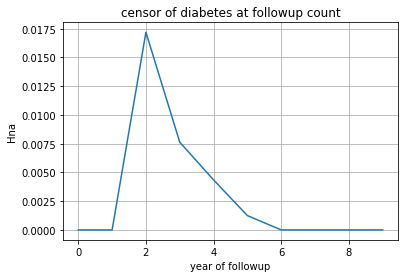

In [42]:
plt.grid()
plt.plot(years, Hna)
plt.xlabel('year of followup')
plt.ylabel('Hna')
plt.title('censor of diabetes at followup count')
plt.show()

Оценка Нельсона – Аалена не персонализирована, т.е. для неё мы никак не использовали признаки пациентов.

Модель пропорциональных рисков Кокса (Cox Proportional Hazard Model, CPHM) моделирует отношение риска для пациента к среднему риску по всем пациентам для данного момента времени. Поскольку это отношение рисков – положительное число, его обычно моделируют как $e^{Xw}$, где $X$ – признаки пациентов, $w$ – обучаемый вектор весов. Таким образом,

$$\hat H_{Cox}(x, t) = \hat H_{NA}(t)e^{xw}.$$

Обратите внимание, что в линейной части CPHM не используют свободный член: в некотором смысле его роль играет $\hat H_{NA}(t)$.

Вероятность заболеть ровно в момент $t$ – это произведение вероятности не заболеть до момента $t$ на вероятность заболеть в момент $t$ при условии здоровья до момента $t$. Таким образом, функция правдоподобия имеет вид

$$L = \prod_{i=1}^N \left[(\hat H_{NA}(T_i)e^{x_iw})^{y_i}(1 - \hat H_{NA}(T_i)e^{x_iw})^{1-y_i}\prod_{t=0}^{T_i-1}\left(1-\hat H_{NA}(t)e^{x_iw}\right)\right],$$

где $T_i$ – момент последней записи, $i$-го пациента.
Максимизация правдоподобия эквивалентна минимизации «минус» нормированного логарифма правдоподобия.

$$\mathcal L = -\frac{1}{N}\log L = -\frac{1}{N}\sum_{i=1}^N\left[y_i\left(\log \hat H_{NA}(T_i) + x_iw\right) + (1-y_i)\left(\log (1-\hat H_{NA}(T_i) e^{x_iw})\right) + \sum_{t=0}^{T_i - 1}\log(1-\hat H_{NA}(t)e^{x_iw})\right]$$

$$\nabla_w\mathcal L = \frac{1}{N}\sum_{i=1}^N\left[-x_iy_i + (1-y_i)\frac{\hat H_{NA}(T_i)e^{x_iw}x_i}{1-\hat H_{NA}(T_i)e^{x_iw}} + \sum_{t=0}^{T_i-1}\frac{\hat H_{NA}(t)e^{x_iw}x_i}{1-\hat H_{NA}(t)e^{x_iw}}\right]$$

Минимизировать $\mathcal L$ можно градиентным спуском, итеративно применяя формулу

$$w:= w - \eta \nabla_w\mathcal L - \eta Cw$$

где $\eta > 0$ — размер шага (learning rate), $C\geq 0$ — коэффициент регуляризации.




**Задание 8** Cox Proportional Hazard Model (CPHM) (3.5 балла).

 Реализуйте градиентный спуск и примените его к модели CPHM.

В качестве критерия останова мы предлагаем использовать следующие условия:
 - евклидова норма разности текущего и нового векторов весов стала меньше, чем 1e-4
 - ограничение на число итераций (например, 10000)
 
Для начальной инициализации весов нужно сравнить следующие подходы:
 - нулевая начальная инициализация
 - случайная
 
Выполните следующие пункты и прокомментируйте полученные результаты:
- Рассмотрите как влияет размер шага на сходимость (попробуйте не менее 5-ти различных значений).
- Рассмотрите регуляризованную модель (не менее 5-ти различных коэффициентов регуляризации), которая описана выше, а также модель без регуляризатора. Сравните, влияет ли наличие регуляризации на скорость сходимости и качество (под качеством во всех случаях подразумевается значение исходного, нерегуляризованного функционала).
- Исследуйте качество оптимизируемого функционала в зависимости от номера итерации (при правильной реализации и подходящем размере шага он должен убывать).
- Влияет ли выбор начальной инициализации весов на скорость и качество?

В каждом пункте требуется построить необходимые графики скорости/качества и дать исчерпывающие выводы.


In [234]:
import math
from sklearn.metrics import log_loss

def calc_grad(X, y, w):
    N = X.shape[0]
    result = 0
    for i in range(N):
        x_i = np.array(X.iloc[i])
        y_i = float(y.iloc[i])
        T_i = int(X.iloc[i]['year of followup'])
        exp_xw = math.exp(x_i @ w)

        result += (
            -x_i * y_i + 
            (1 - y_i) * ((Hna[T_i] * exp_xw) / (1 - Hna[T_i] * exp_xw)) * x_i +
            sum(
                (Hna[t] * exp_xw) / (1 - Hna[t] * exp_xw) * x_i
                for t in range(0, T_i)
            )     
        )
    return result / N

def calc_next_w(w, rate, C, grad):
    return w - rate * grad - rate * C * w

def calc_Hcox(X, t, w):
    return Hna[t] * np.exp(np.array(X) @ w)

def scale(y):
    return np.array([0 if e < 0 else 1 if e > 1 else e for e in y])

def calc_w(X_df, y_ser, rate, C, start_w, tol = 0.0001, max_iter=30):
    X = np.array(X_df)
    y = np.array(y_ser).squeeze()
    curr_w = start_w
    curr_y = scale(calc_Hcox(X_df, 5, curr_w))
    curr_loss = log_loss(y, curr_y)
    curr_grad = calc_grad(X_df, y_ser, curr_w)
    
    next_w = calc_next_w(curr_w, rate, C, curr_grad)
    next_y = scale(calc_Hcox(X_df, 5, next_w))
    next_loss = log_loss(y, next_y)

    total_loss = {}
    curr_iter = 0
    while np.linalg.norm(curr_y - next_y) > tol and curr_iter < max_iter:
        curr_w = next_w
        curr_y = next_y
        curr_loss = next_loss
        curr_grad = calc_grad(X_df, y_ser, curr_w)

        next_w = calc_next_w(curr_w, rate, C, curr_grad)
        next_y = scale(calc_Hcox(X_df, 5, next_w))
        next_loss = log_loss(y, next_y)

        # print('loss: ', curr_loss, '   norm: ', np.linalg.norm(next_y - curr_y))
        
        total_loss[curr_iter] = curr_loss
        curr_iter += 1
    
    return w, curr_iter, curr_loss, total_loss

*Сравним сходимость с разной длиной шага.*

In [249]:
size = 100
loss_1 = calc_w(lab_train_x.iloc[:size], lab_train_y.iloc[:size], rate=0.0002, C=0, start_w=np.full(lab_train_x.iloc[0].shape, 0), tol=0.00001, max_iter=1000)[3]

In [250]:
loss_2 = calc_w(lab_train_x.iloc[:size], lab_train_y.iloc[:size], rate=0.0003, C=0, start_w=np.full(lab_train_x.iloc[0].shape, 0), tol=0.00001, max_iter=1000)[3]
loss_3 = calc_w(lab_train_x.iloc[:size], lab_train_y.iloc[:size], rate=0.0005, C=0, start_w=np.full(lab_train_x.iloc[0].shape, 0), tol=0.00001, max_iter=1000)[3]
loss_4 = calc_w(lab_train_x.iloc[:size], lab_train_y.iloc[:size], rate=0.0006, C=0, start_w=np.full(lab_train_x.iloc[0].shape, 0), tol=0.00001, max_iter=1000)[3]

In [251]:
loss_5 = calc_w(lab_train_x.iloc[:size], lab_train_y.iloc[:size], rate=0.0007, C=0, start_w=np.full(lab_train_x.iloc[0].shape, 0), tol=0.00001, max_iter=1000)[3]

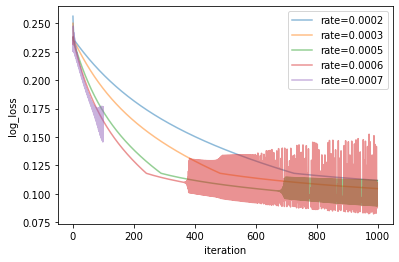

In [279]:
plt.plot(list(loss_1.keys()), list(loss_1.values()), alpha = 0.5)
plt.plot(list(loss_2.keys()), list(loss_2.values()), alpha = 0.5)
plt.plot(list(loss_3.keys()), list(loss_3.values()), alpha = 0.5)
plt.plot(list(loss_4.keys()), list(loss_4.values()), alpha = 0.5)
plt.plot(list(loss_5.keys()), list(loss_5.values()), alpha = 0.5)
plt.legend(('rate=0.0002', 'rate=0.0003', 'rate=0.0005', 'rate=0.0006', 'rate=0.0007'))
plt.xlabel('iteration')
plt.ylabel('log_loss')
plt.show()

*На этом графике видно, что алгоритм с меньшим шагом сходится медленнее и позже и чем больше шаг, тем раньше loss начинает "прыгать".*

Посмотрим, как влияет регуляризация

In [301]:
loss_3_reg_1 = calc_w(lab_train_x.iloc[:size], lab_train_y.iloc[:size], rate=0.0006, C=0, start_w=np.full(lab_train_x.iloc[0].shape, 0), tol=0.00001, max_iter=1000)[3]
loss_3_reg_2 = calc_w(lab_train_x.iloc[:size], lab_train_y.iloc[:size], rate=0.0006, C=2, start_w=np.full(lab_train_x.iloc[0].shape, 0), tol=0.00001, max_iter=1000)[3]
loss_3_reg_3 = calc_w(lab_train_x.iloc[:size], lab_train_y.iloc[:size], rate=0.0006, C=4, start_w=np.full(lab_train_x.iloc[0].shape, 0), tol=0.00001, max_iter=1000)[3]
loss_3_reg_4 = calc_w(lab_train_x.iloc[:size], lab_train_y.iloc[:size], rate=0.0006, C=6, start_w=np.full(lab_train_x.iloc[0].shape, 0), tol=0.00001, max_iter=1000)[3]
loss_3_reg_5 = calc_w(lab_train_x.iloc[:size], lab_train_y.iloc[:size], rate=0.0006, C=8, start_w=np.full(lab_train_x.iloc[0].shape, 0), tol=0.00001, max_iter=1000)[3]

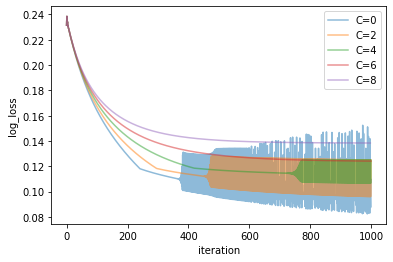

In [303]:
plt.plot(list(loss_3_reg_1.keys()), list(loss_3_reg_1.values()), alpha = 0.5)
plt.plot(list(loss_3_reg_2.keys()), list(loss_3_reg_2.values()), alpha = 0.5)
plt.plot(list(loss_3_reg_3.keys()), list(loss_3_reg_3.values()), alpha = 0.5)
plt.plot(list(loss_3_reg_4.keys()), list(loss_3_reg_4.values()), alpha = 0.5)
plt.plot(list(loss_3_reg_5.keys()), list(loss_3_reg_5.values()), alpha = 0.5)
plt.legend(('C=0', 'C=2', 'C=4', 'C=6', 'C=8'))
plt.xlabel('iteration')
plt.ylabel('log_loss')
plt.show()

*Здесь видно, что чем больше коэффициент регуляризации, тем позже график начинает "прыгать", но качество при этом также падает. Скорость сходимости вроде не падает.*

*Посмотрим, как влияет выбор начальных весов*

In [321]:
loss_w_1 = calc_w(lab_train_x.iloc[:size], lab_train_y.iloc[:size], rate=0.0006, C=0, start_w=np.full(lab_train_x.iloc[0].shape, 0.0000), tol=0.00001, max_iter=20)[3]
loss_w_2 = calc_w(lab_train_x.iloc[:size], lab_train_y.iloc[:size], rate=0.0006, C=0, start_w=np.full(lab_train_x.iloc[0].shape, 0.0010), tol=0.00001, max_iter=20)[3]
loss_w_3 = calc_w(lab_train_x.iloc[:size], lab_train_y.iloc[:size], rate=0.0006, C=0, start_w=np.full(lab_train_x.iloc[0].shape, 0.0020), tol=0.00001, max_iter=20)[3]
loss_w_4 = calc_w(lab_train_x.iloc[:size], lab_train_y.iloc[:size], rate=0.0006, C=0, start_w=np.full(lab_train_x.iloc[0].shape, 0.0025), tol=0.00001, max_iter=20)[3]
loss_w_5 = calc_w(lab_train_x.iloc[:size], lab_train_y.iloc[:size], rate=0.0006, C=0, start_w=np.full(lab_train_x.iloc[0].shape, 0.0030), tol=0.00001, max_iter=20)[3]

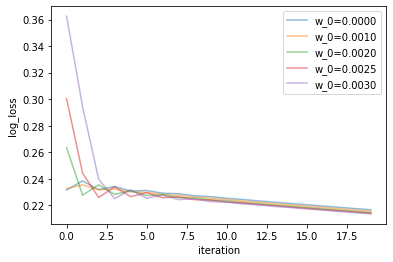

In [324]:
plt.plot(list(loss_w_1.keys()), list(loss_w_1.values()), alpha = 0.5)
plt.plot(list(loss_w_2.keys()), list(loss_w_2.values()), alpha = 0.5)
plt.plot(list(loss_w_3.keys()), list(loss_w_3.values()), alpha = 0.5)
plt.plot(list(loss_w_4.keys()), list(loss_w_4.values()), alpha = 0.5)
plt.plot(list(loss_w_5.keys()), list(loss_w_5.values()), alpha = 0.5)
plt.legend(('w_0=0.0000', 'w_0=0.0010', 'w_0=0.0020', 'w_0=0.0025', 'w_0=0.0030'))
plt.xlabel('iteration')
plt.ylabel('log_loss')
plt.show()

*Выбор начальных весов влияет и прям сильно, я не смог найти ничего лучше, чем начальные нулевые. Возможно, так не должно быть.*

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому обычно используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит сразу по этому объекту.

**Задание 9** SGD (1.5 балла)

Реализуйте метод стохастического градиентного спуска (sgd). В этом случае вы можете выбрать наиболее удачный функционал, исходя из предыдущего пункта (с регуляризацией, без), а также схему начальной инициализации весов.

Сравните рассмотренные методы (градиентный спуск и sgd) между собой с точки зрения скорости сходимости и качества.

Посмотрите как влияет размер шага на сходимость (попробуйте 4-5 различных значений)
Исследуйте качество оптимизируемого функционала в зависимости от номера итерации
Выберите лучший размер шага.

В каждом пункте сделайте исчерпывающие выводы, подкреплённые графиками.

*Стохастический градиентный спуск, если я правильно помню, это значит, берём обычный, и для него считаем направление только по одному случайному признаку.*

In [327]:
X_train.shape[1]

24

In [349]:
def calc_grad_stoh(X, y, w):
    N = X.shape[0]
    result = 0

    rand_index = np.random.randint(0, X.shape[1])

    for i in range(N):
        x_i = np.array(X.iloc[i])[rand_index]
        y_i = float(y.iloc[i])
        T_i = int(X.iloc[i]['year of followup'])
        exp_xw = math.exp(x_i * w[rand_index])

        result += (
            -x_i * y_i + 
            (1 - y_i) * ((Hna[T_i] * exp_xw) / (1 - Hna[T_i] * exp_xw)) * x_i +
            sum(
                (Hna[t] * exp_xw) / (1 - Hna[t] * exp_xw) * x_i
                for t in range(0, T_i)
            )     
        )
    result_array = np.zeros(X.shape[1])
    result_array[rand_index] = result / N
    return result_array

def calc_w_stoh(X_df, y_ser, rate, C, start_w, tol = 0.0001, max_iter=30):
    X = np.array(X_df)
    y = np.array(y_ser).squeeze()
    curr_w = start_w
    curr_y = scale(calc_Hcox(X_df, 5, curr_w))
    curr_loss = log_loss(y, curr_y)
    curr_grad = calc_grad_stoh(X_df, y_ser, curr_w)
    
    next_w = calc_next_w(curr_w, rate, C, curr_grad)
    next_y = scale(calc_Hcox(X_df, 5, next_w))
    next_loss = log_loss(y, next_y)

    total_loss = {}
    curr_iter = 0
    
    # np.linalg.norm(curr_y - next_y) > tol and 

    while curr_iter < max_iter:
        curr_w = next_w
        curr_y = next_y
        curr_loss = next_loss
        curr_grad = calc_grad_stoh(X_df, y_ser, curr_w)

        next_w = calc_next_w(curr_w, rate, C, curr_grad)
        next_y = scale(calc_Hcox(X_df, 5, next_w))
        next_loss = log_loss(y, next_y)

        # print('loss: ', curr_loss, '   norm: ', np.linalg.norm(next_y - curr_y))
        
        total_loss[curr_iter] = curr_loss
        curr_iter += 1
    
    return w, curr_iter, curr_loss, total_loss

*Посмотрим сходимость с разной длиной шага.*

In [376]:
size = 100
loss_1_stoh = calc_w_stoh(lab_train_x.iloc[:size], lab_train_y.iloc[:size], rate=0.0001, C=0, start_w=np.full(lab_train_x.iloc[0].shape, 0), tol=0.0001, max_iter=500)[3]
loss_2_stoh = calc_w_stoh(lab_train_x.iloc[:size], lab_train_y.iloc[:size], rate=0.0003, C=0, start_w=np.full(lab_train_x.iloc[0].shape, 0), tol=0.0001, max_iter=500)[3]
loss_3_stoh = calc_w_stoh(lab_train_x.iloc[:size], lab_train_y.iloc[:size], rate=0.0005, C=0, start_w=np.full(lab_train_x.iloc[0].shape, 0), tol=0.0001, max_iter=500)[3]
loss_4_stoh = calc_w_stoh(lab_train_x.iloc[:size], lab_train_y.iloc[:size], rate=0.0007, C=0, start_w=np.full(lab_train_x.iloc[0].shape, 0), tol=0.0001, max_iter=500)[3]
loss_5_stoh = calc_w_stoh(lab_train_x.iloc[:size], lab_train_y.iloc[:size], rate=0.0009, C=0, start_w=np.full(lab_train_x.iloc[0].shape, 0), tol=0.0001, max_iter=500)[3]

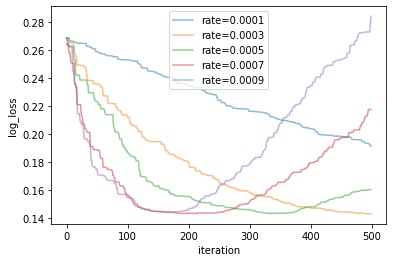

In [378]:
plt.plot(list(loss_1_stoh.keys()), list(loss_1_stoh.values()), alpha = 0.5)
plt.plot(list(loss_2_stoh.keys()), list(loss_2_stoh.values()), alpha = 0.5)
plt.plot(list(loss_3_stoh.keys()), list(loss_3_stoh.values()), alpha = 0.5)
plt.plot(list(loss_4_stoh.keys()), list(loss_4_stoh.values()), alpha = 0.5)
plt.plot(list(loss_5_stoh.keys()), list(loss_5_stoh.values()), alpha = 0.5)
plt.legend(('rate=0.0001', 'rate=0.0003', 'rate=0.0005', 'rate=0.0007', 'rate=0.0009'))
plt.xlabel('iteration')
plt.ylabel('log_loss')
plt.show()

*Убрал остановку по норме разности соседних, оставил только количество итераций. Видно, что чем больше шаг, быстрее ошибка уменьшается, но затем также быстрее улетает вверх.*

*Можно сказать, что стохастический градиентный спуск сходится медленнее (по итерациям), но быстрее считается каждая итерация (по времени).*

Между обновлением вектора весов по всей выборке и на одном объекте есть промежуточный подход — выбирать некоторое случайное подмножество объектов и обновлять веса по нему. Такой подход называется mini-batch. Мы не будем реализовывать этот подход в данной работе, однако иногда его бывает осмысленно использовать на практике. 

Один из недостатков sgd состоит в том, что он может не доходить до локального оптимального решения, а осциллировать в окрестности. 

![](http://sebastianruder.com/content/images/2015/12/without_momentum.gif)

Для решения этой проблемы существуют методы, позволяющие устранить этот недостаток, а также ускорить сходимость. Рассмотрим некоторые из них.

![](http://nghenglim.github.io/images/2015061300.png)

### Momentum

Этот метод позволяет направить sgd в нужной размерности и уменьшить осцилляцию. 

В общем случае он будет выглядеть следующим образом: 

$$ v_t = \gamma v_{t - 1} + \eta \nabla_{w}{J(w)}$$
$$ w = w - v_t$$

где

 - $w$ — вектор параметров
 - $J$ — оптимизируемый функционал
 - $\gamma$ — momentum term (обычно выбирается 0.9)
 
### Adagrad 

Одной из сложностей является выбор размера шага (*learning rate*). Основное отличие данного метода от SGD состоит в том что размер шага определяется для каждого параметра индивидуально. Этот метод хорошо работает с разреженным данным большого объема. 

Обозначим градиент по параметру $w_i$ на итерации $t$ как $g_{t,i} = \nabla_{w}J(w_i)$. 

В случае sgd обновление параметра $w_i$ будет выглядеть следующим образом:

$$ w_{t+1, i} = w_{t, i} - \eta \cdot g_{t,i}$$

А в случае Adagrad общий шаг $\eta$ нормируется на посчитанные ранее градиенты для данного параметра:

$$ w_{t+1, i} = w_{t, i} - \dfrac{\eta}{\sqrt{G_{t,ii} + \varepsilon}} \cdot g_{t,i}$$

где $G_t$ — диагональная матрица, где каждый диагональный элемент $i,i$ — сумма квадратов градиентов для $w_{i}$ до $t$-ой итерации. $\varepsilon$ — гиперпараметр, позволяющий избежать деления на 0 (обычно выбирается около *1e-8*).

Так как матрица $G_t$ диагональна, в векторном виде это будет выглядеть следующим образом (здесь $\odot$ — матричное умножение):

$$ w_{t+1} = w_{t} - \dfrac{\eta}{\sqrt{G_t + \varepsilon}} \odot g_t $$

### Adadelta

Adadelta, в отличии от Adagrad, рассматривает не все предыдущие значения градиентов, а только последние $k$. Кроме того, сумма градиентов определяется как уменьшающееся среднеее всех предыдущих квадратов градиентов. Текущее среднее $E[g^2]_t$ на итерации $t$ будет вглядеть следующим образом:

$$ E[g^2]_t = \gamma E[g^2]_{t-1} + (1-\gamma)g_t^2 $$

здесь $\gamma$ аналогична гиперпараметру из метода Momentum.

Тогда обновление весов можно записать следующим образом:

$$ w_{t+1} = w_{t} - \dfrac{\eta}{\sqrt{E[g^2]_t + \varepsilon}} g_t $$ 

Перепишем это немного по-другому:

$$ w_{t+1} = w_{t} + \Delta w_t$$ 
$$\Delta w_t = - \dfrac{\eta}{\sqrt{E[g^2]_t + \varepsilon}} g_t $$ 

Аналогично среднему для градиентов определим среднее для параметров $w$:

$$ E[\Delta w^2]_t = \gamma E[\Delta w^2]_{t-1} + (1-\gamma)\Delta w^2 $$

Введем обозначение $RMS[p]_t = \sqrt{E[p]_t + \varepsilon}$

Тогда Adadelta выглядит следующим образом:

$$\Delta w_t = - \dfrac{RMS[\Delta w^2]}{RMS[ga^2]} g_t $$ 
$$ w_{t+1} = w_{t} + \Delta w_t$$ 


Более подробно об этих и других способах оптимизации можно прочитать:
 - [здесь](http://sebastianruder.com/optimizing-gradient-descent/index.html#gradientdescentoptimizationalgorithms) очень хорошее описание различных способов оптимизации, в этом задании мы опираемся на терминологию из данной статьи
 - статья про [momentum](https://pdfs.semanticscholar.org/97da/c94ffd7a7ac09a4218848300cc7e98569d77.pdf)
 - оригинальная статья про [adagrad](http://www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf)
 - оригинальная статья про [adadelta](http://arxiv.org/pdf/1212.5701v1.pdf)
 - википедия про [momentum](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Momentum) и [adagrad](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#AdaGrad)
 - [визуализация](http://imgur.com/a/Hqolp) разных способов оптимизации

**Задание 10** Реализуйте метод оптимизации *Momentum* (1 балл) и 

**Задание 11** Реализуйте один из *Adagrad*/*Adadelta* (1.5 балла).

В заданиях 10, 11:
- Сравните оба метода с классическим sgd с точки зрения скорости сходимости.
- Посмотрите как значение гиперпараметра $\gamma$ влияет на скорость сходимости и качество в методе *Momentum*.

Постройте графики и опишите полученные результаты.

Дало ли преимущество использование адаптивного шага в методе *Adagrad*/*Adadelta*?

**Задание 12** Предсказание с помощью CPHM, интерфейс sklearn (1 балл)


Чтобы сравнить CPHM с предыдущими моделями, надо научиться предсказывать целевую переменную. С помощью значений персональной функции риска $\hat H_{Cox}(x, t)$ можно выразить вероятность того, что человек в течение 5 лет не заболеет при условии, что он не прекратит участие в эксперементе по другим причинам. Вероятность того, что человек не прекратит участие в эксперименте, оставаясь здоровым, также можно оценить из данных.

Реализуйте модель CPHM, унаследовав класс модели от [BaseEstimator](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator). Модель должна поддерживать методы fit, predict, predict_proba. Это вам позволит в следующем задании её откалибровать. При тестировании модели следует передать то время, через которое вас интересует состояние пациента (в случае конкурса, 5 лет).




**Задание 13** Калибровка классификатора (2 балла)

Сравнительно простой способ уточнить оценки вероятности и уменьшить logloss -- откалибровать модель. Вообще говоря, сравнивать между собой некалиброванные модели по logloss некорректно: хорошая модель с нарушенной калибровкой может иметь сколь угодно большое значение logloss.

Идея калибровки состоит в том, чтобы подобрать простое преобразование, которое превратит выходы моделей в вероятности принадлежности классам.

Есть несколько известных методов калибровки:
 - Калибровка Платта.
 - Изотоническая регрессия.

Обратите внимание, что преобразование необходимо обучать на отложенной выборке (то есть классификатор и калибровка должны обучаться на разных подмножествах данных), иначе можно переобучиться. Калибровку можно применять к любым классификаторам (где это разумно и необходимо), особенно к тем, которые не оптимизируют logloss явно.

Для калибровки классификатора в sklearn возможны два подхода:
 - взять уже обученный классификатор и откалибровать его на отложенной выборке
 - откалибровать по кросс-валидации: калибровочному классификатору передается вся обучающая выборка, которая внутри разбивается на обучающую и калибровочную, после чего происходит усреднение вероятностей по фолдам.
 
Подробнее об этом можно прочитать в [документации](http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html#sklearn.calibration.CalibratedClassifierCV). Также [здесь](https://jmetzen.github.io/2015-04-14/calibration.html) можно узнать подробности о калибровке в sklearn от автора.

Используйте оба описанных выше подхода (калибровку Платта и изотоническую регрессию) для калибровки моделей, построенных в лабораторной работе. Для каждой модели постройте график, на котором будут изображены [калибровочные кривые](http://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html): идеальная, исходного классификатора, а также для каждого из методов. Калибровочная кривая строится путем упорядочения всех объектов по предсказанному значению, которые разбиваются на бины. По оси OX откладывается среднее предсказанное значение вероятности по бину, а по OY — доля положительных примеров. В случае идеальных вероятностей это будет прямая.
 


Выполнив задания, не забудьте отправить решение в [конкурс](https://www.kaggle.com/c/competition-2-yandex-shad-spring-2021)

**Выводы** (1.5 балла)

- Какие есть достоинства и недостатки у рассмотренных в лабораторной работе моделей?
- Какие модели сильно улучшили свой logloss после калибровки, а какие - нет? Почему так произошло?
- Какие из рассмотренных методов могут обучиться на маленьких датасетах? А какие применимы для очень больших датасетов? Какие проблемы могут возникнуть при применении к большим датасетам и как их можно решить?
